# Normalising Data
When your model is dependent on distance calculations, large range features can dominate the result. After normalisation, each feature contributes equally.

## Linear Regression
We can see that there is no effect on r2 of normalisation on linear regression model, this is because r2 is calculated from predicted vs actual values  and not on feature scales.

In [59]:
# Setup

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model

data = pd.read_csv(open('../data/Auto.csv'))
data.set_index('name', inplace=True)

X = data.drop(columns=['mpg'])
y = data['mpg']

X


,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1
vw pickup,4,97.0,52,2130,24.6,82,2
dodge rampage,4,135.0,84,2295,11.6,82,1


In [60]:
## Before normalisation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Before Normalisation:")
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

Before Normalisation:
R^2 Score: 0.7901500386760352


In [63]:
## normalisation
data = pd.read_csv(open('../data/Auto.csv'))
data.set_index('name', inplace=True)
X = data.drop(columns=['mpg'])
for feature in X:
    max = X[feature].max()
    min = X[feature].min()
    X[feature] = (X[feature] - min) / ( max - min )
        
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
buick skylark 320,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
plymouth satellite,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
amc rebel sst,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
ford torino,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
ford mustang gl,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
vw pickup,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
dodge rampage,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0


In [64]:
## After normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("After Normalisation:")
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

After Normalisation:
R^2 Score: 0.7901500386760344


---

## KNN
We can see a huge increase in R² after normalization. This is because the distances are no longer skewed by features with large ranges.

In [84]:
# setup for KNN
data = pd.read_csv(open('../data/Auto.csv'))
data.set_index('name', inplace=True)
X = data.drop(columns=['mpg'])
y = data['mpg']
neighbors = 5
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1
vw pickup,4,97.0,52,2130,24.6,82,2
dodge rampage,4,135.0,84,2295,11.6,82,1


In [85]:
# before normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsRegressor
print("Before Normalisation:")
model = KNeighborsRegressor(n_neighbors=neighbors)
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

Before Normalisation:
R^2 Score: 0.6521862291798177


In [86]:
# normalisation
for feature in X:
    max = X[feature].max()
    min = X[feature].min()
    X[feature] = (X[feature] - min) / ( max - min )

X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
buick skylark 320,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
plymouth satellite,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
amc rebel sst,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
ford torino,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
ford mustang gl,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
vw pickup,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
dodge rampage,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0


In [87]:
# After normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("After Normalisation:")
model = KNeighborsRegressor(n_neighbors=neighbors)
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

After Normalisation:
R^2 Score: 0.8382448744645485


# Extra investigation

I will now test the effect of increasing the neighbors in KNN on r2 before and after normalisation

## Outcome

- Increasing the neighbors before normalisation increase r2 up to n = 10 and when n > 10, it stabalised around r2 = 0.65, this may be due to the noise in the data and large range features dominating the result.

- Increasing the neighbors after normalisation increase r2 up to n = 5 and when n > 5, it steadily decreases, this may be due to the fact all features are equally weighted and the not informative features can add noise to the distance metric. We need to look into which features are important and only use them to make decisions.


In [118]:
# setup for KNN
from matplotlib import pyplot as plt

data = pd.read_csv(open('../data/Auto.csv'))
data.set_index('name', inplace=True)
X = data.drop(columns=['mpg'])
y = data['mpg']
neighbors_to_r2 = {}
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1
vw pickup,4,97.0,52,2130,24.6,82,2
dodge rampage,4,135.0,84,2295,11.6,82,1


Before Normalisation:


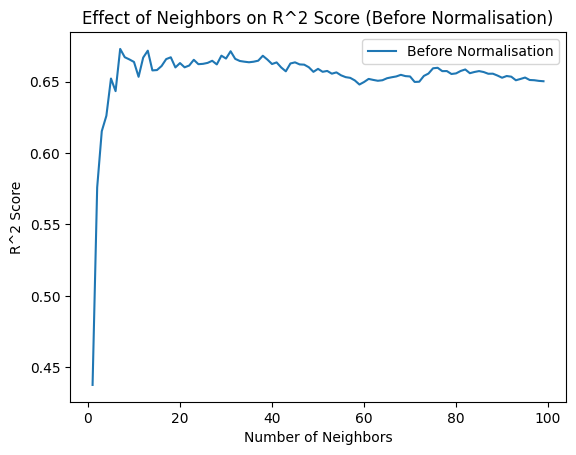

In [119]:
# before normalisation

def Knn():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    from sklearn.neighbors import KNeighborsRegressor
    print("Before Normalisation:")
    for neighbors in range(1,100):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        r2_score = model.score(X_test, y_test)
        neighbors_to_r2[neighbors] = r2_score


    x1 = list(neighbors_to_r2.keys())
    y1 = list(neighbors_to_r2.values())

    plt.plot(x1, y1, label="Before Normalisation")
    xlabel = "Number of Neighbors"
    ylabel = "R^2 Score"
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Effect of Neighbors on R^2 Score (Before Normalisation)")
    plt.legend()
    plt.show()

Knn()

In [120]:
# normalisation
for feature in X:
    max = X[feature].max()
    min = X[feature].min()
    X[feature] = (X[feature] - min) / ( max - min )

X


,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
buick skylark 320,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
plymouth satellite,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
amc rebel sst,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
ford torino,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
ford mustang gl,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
vw pickup,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
dodge rampage,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0


Before Normalisation:


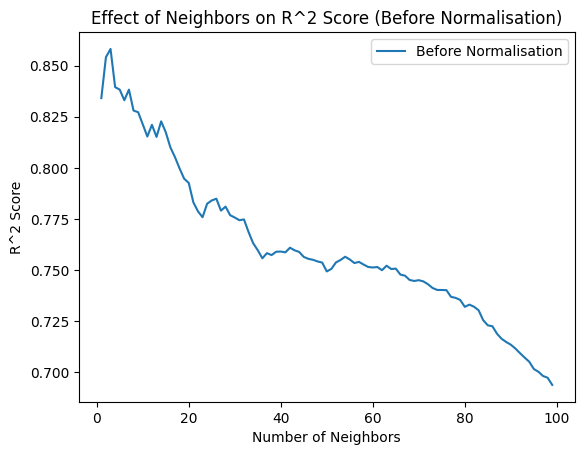

In [ ]:
## After normalisation
Knn()